In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/CC GENERAL.csv')
df.drop(['CUST_ID'], axis=1, inplace=True)

In [ ]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
cols = df.columns
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df.shape

(8950, 17)

In [ ]:
cols

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

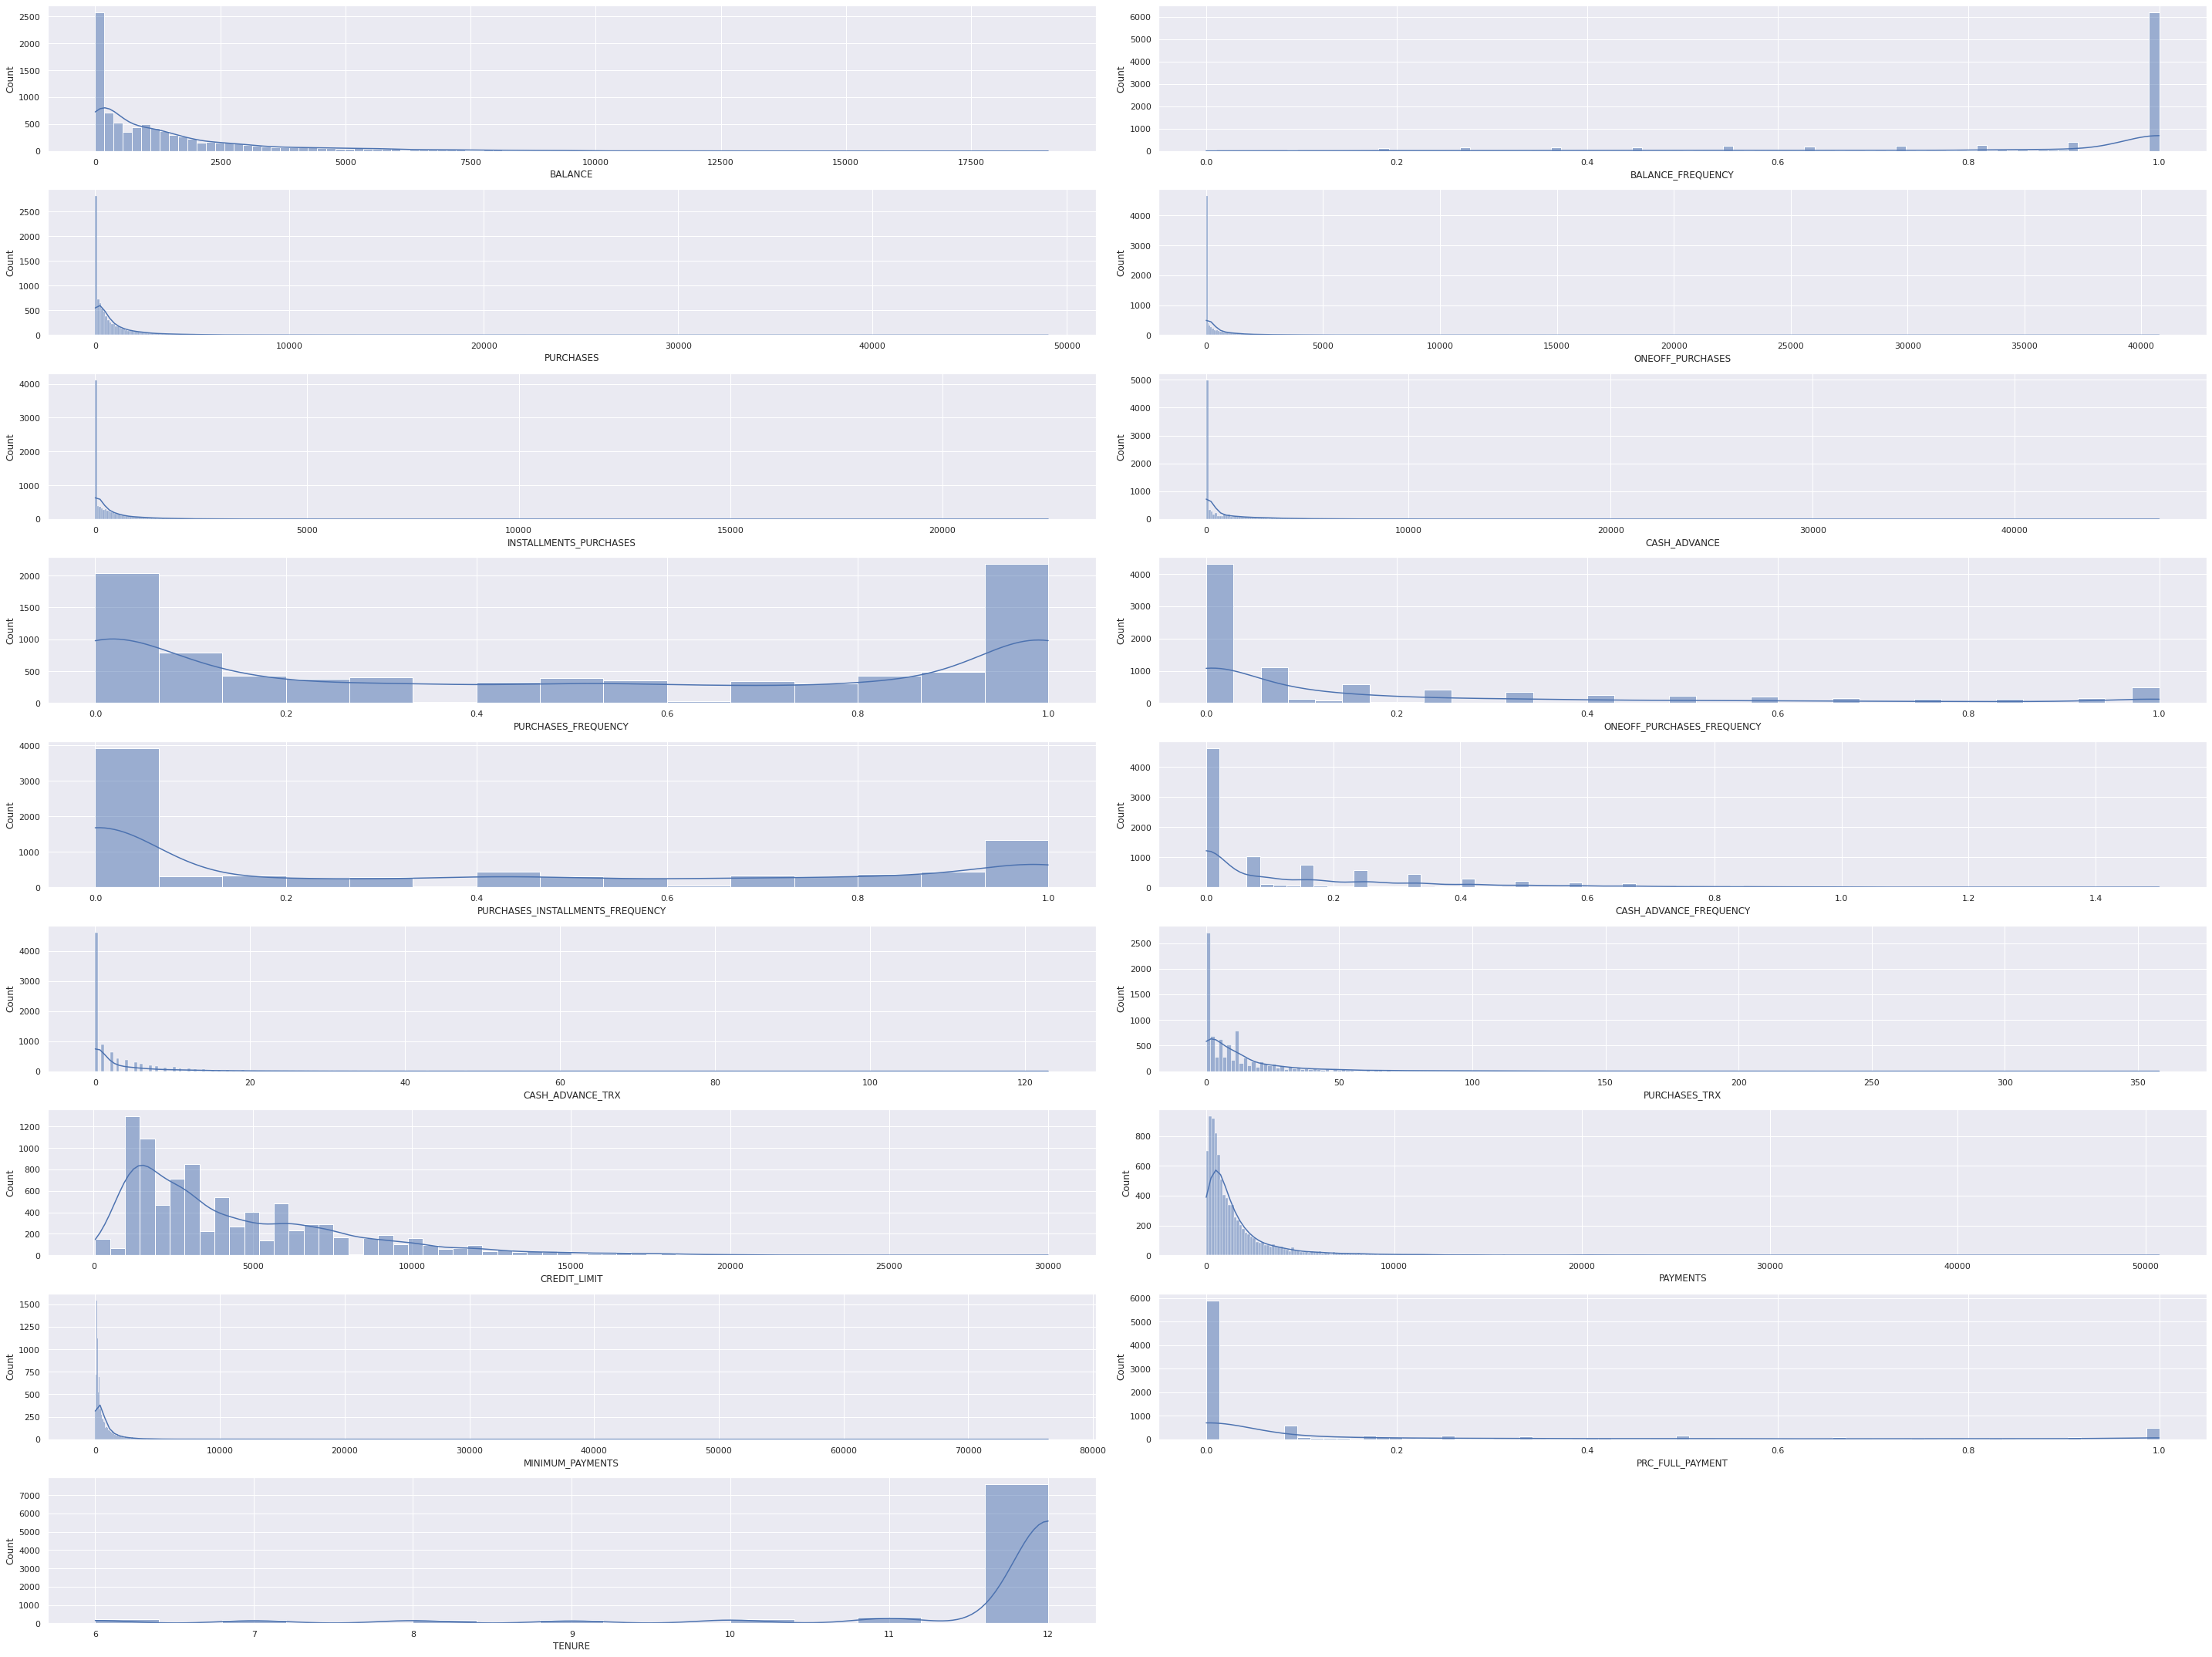

In [ ]:
fig = plt.figure(figsize=(40, 30), constrained_layout=True)
for i in range(len(df.columns)):
    plt.subplot(9, 2 , i+1)
    sns.histplot(df[df.columns[i]], kde=True)
    fig.tight_layout()

In [ ]:
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = normalize(df) 
df = pd.DataFrame(df)

In [ ]:
df.columns = cols

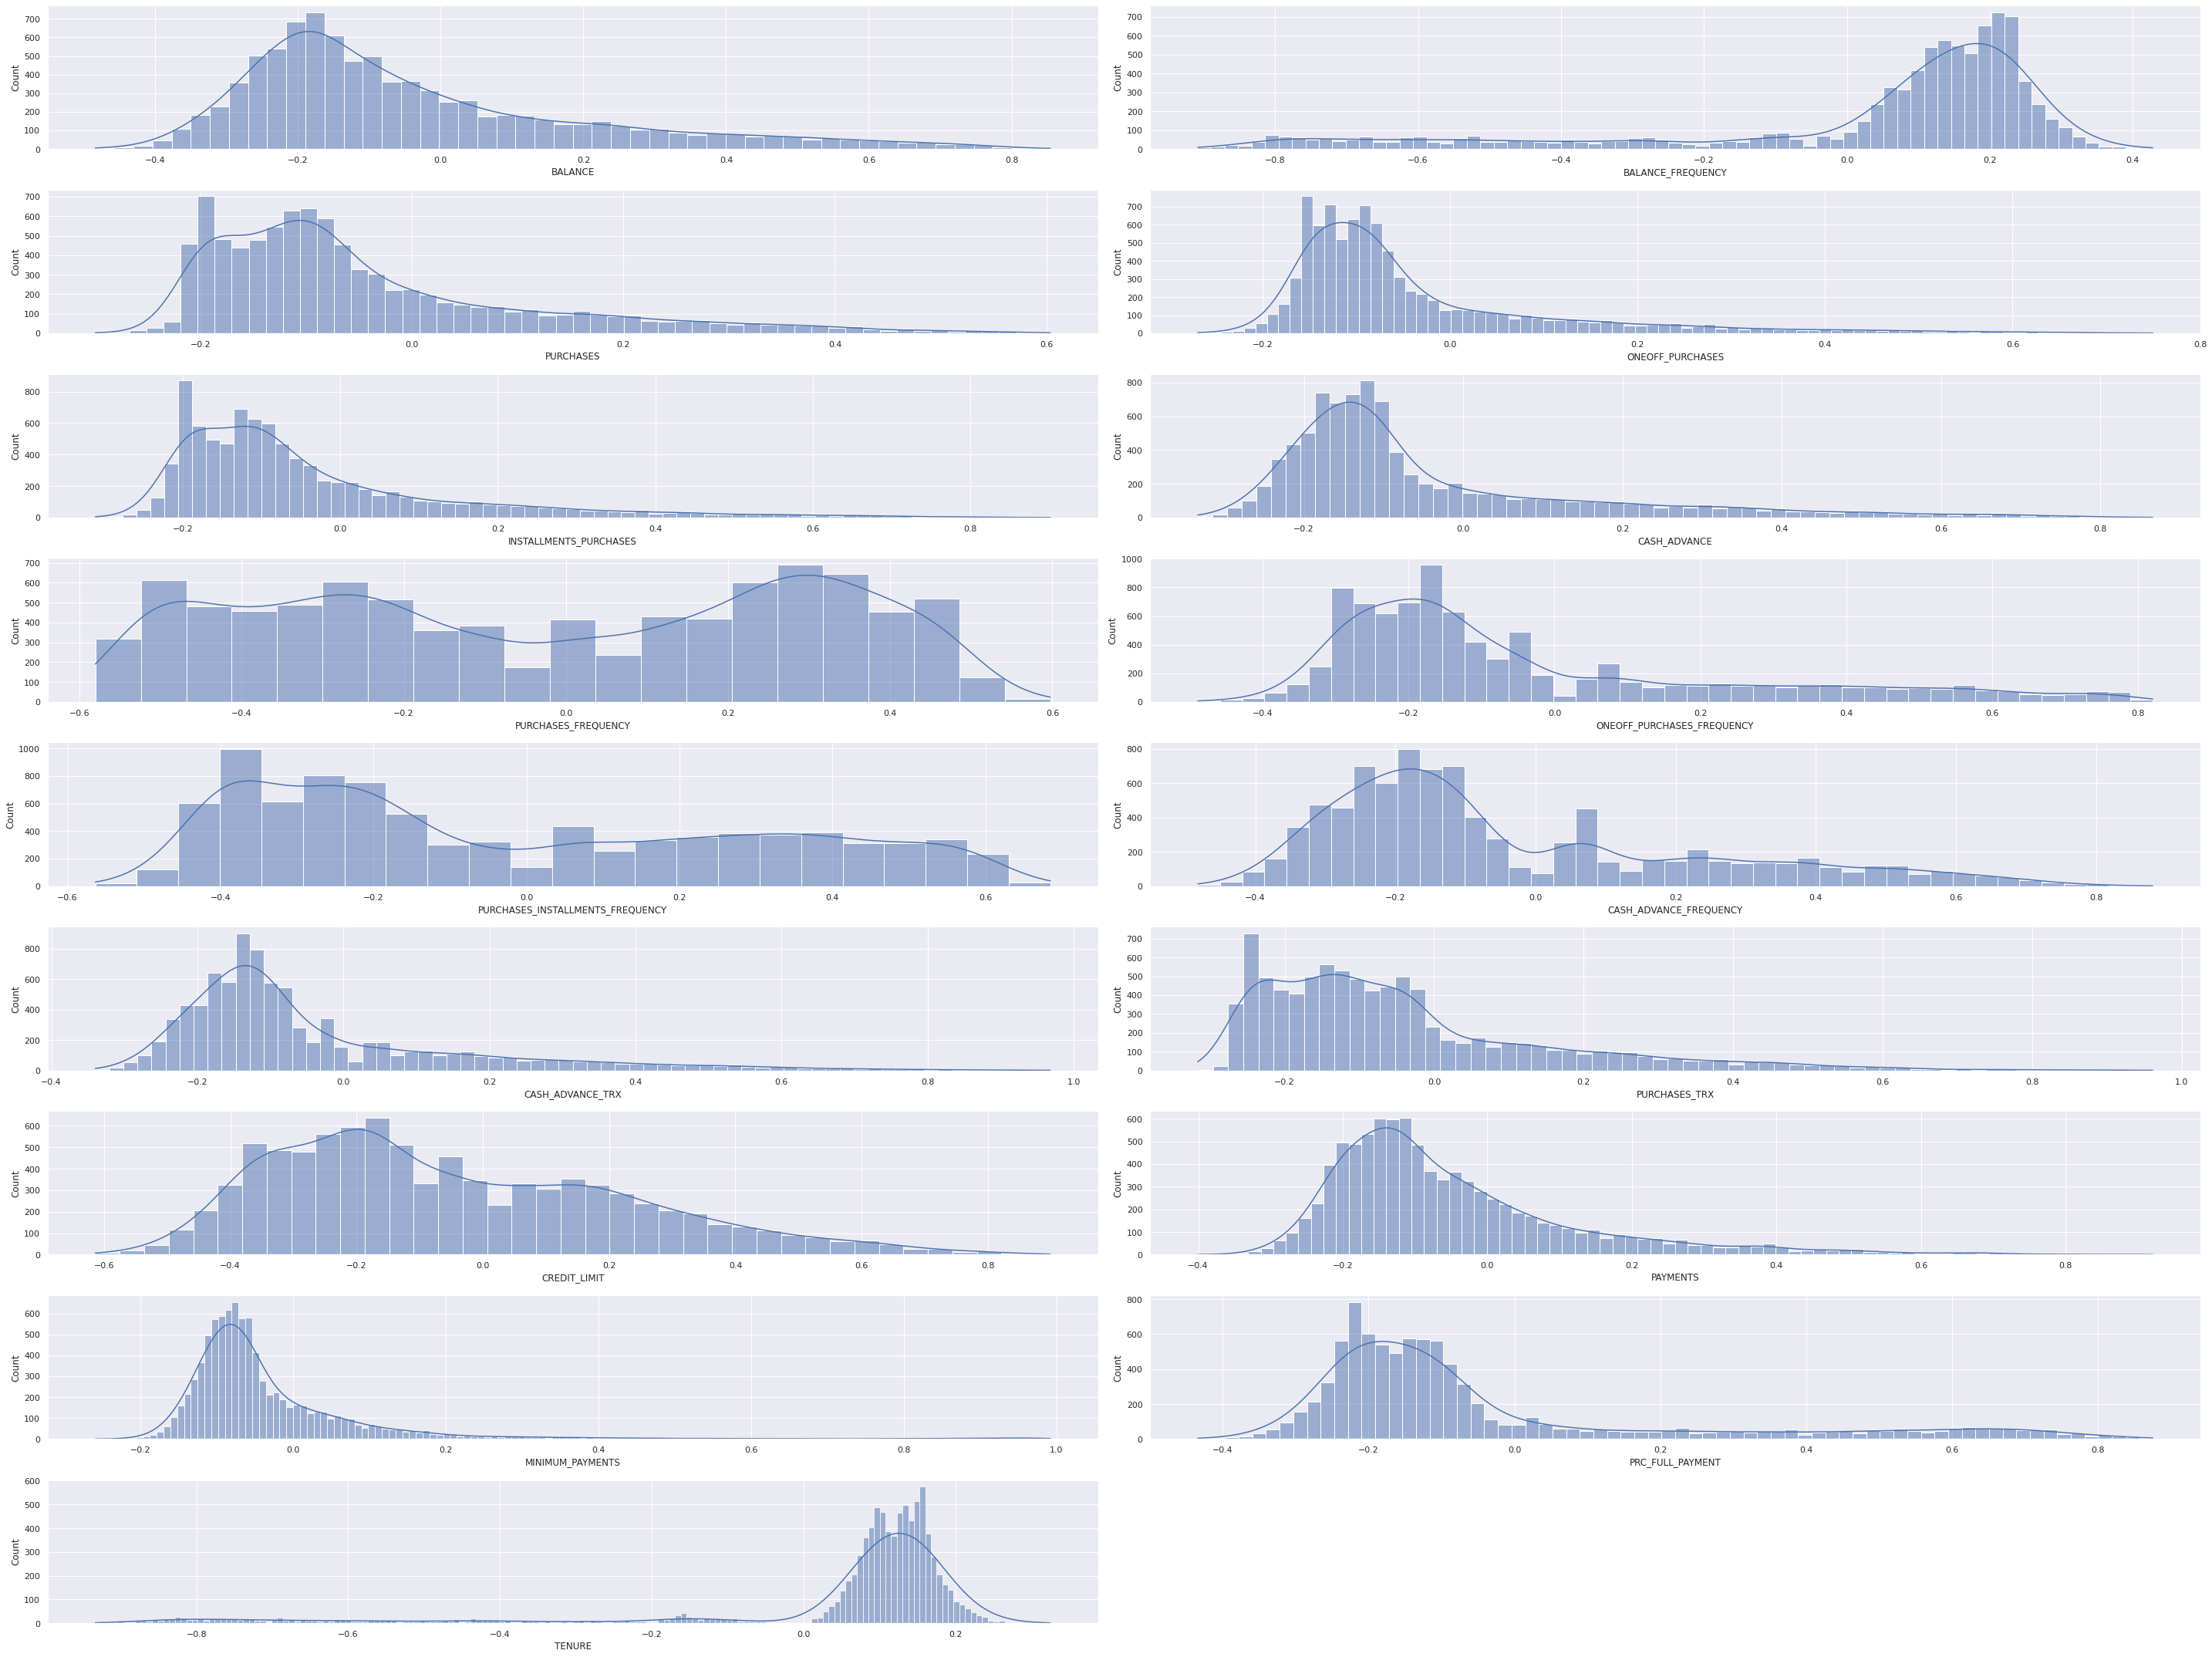

In [ ]:
fig = plt.figure(figsize=(40, 30), constrained_layout=True)
for i in range(len(df.columns)):
    plt.subplot(9, 2 , i+1)
    sns.histplot(df[df.columns[i]], kde=True)
    fig.tight_layout()

Explained variation per principal component: [0.29045124 0.18403609]
Cumulative variance explained by 2 principal components: 47.45%


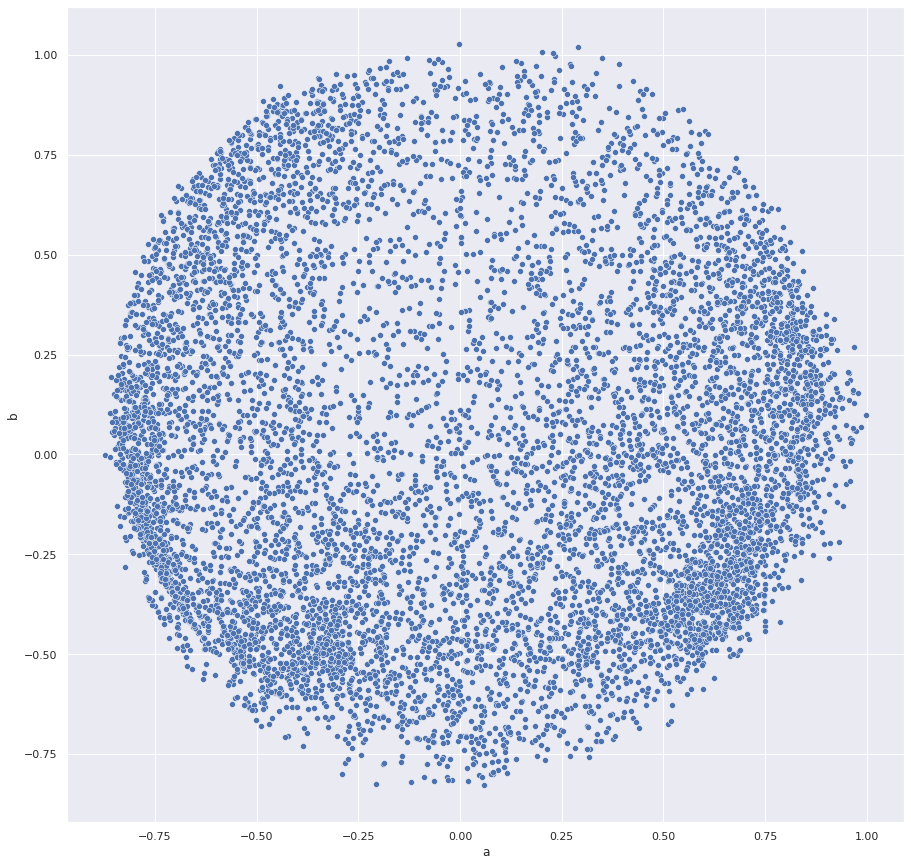

In [ ]:
pcar = PCA(n_components = 2) 
pca = pcar.fit_transform(df)
print('Explained variation per principal component: {}'.format(pcar.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pcar.explained_variance_ratio_)))
pca = pd.DataFrame(pca)
mapping = {pca.columns[0]: 'a', pca.columns[1]: 'b'}
pca = pca.rename(columns=mapping)
sns.scatterplot(data=pca, x='a', y='b', palette="viridis")

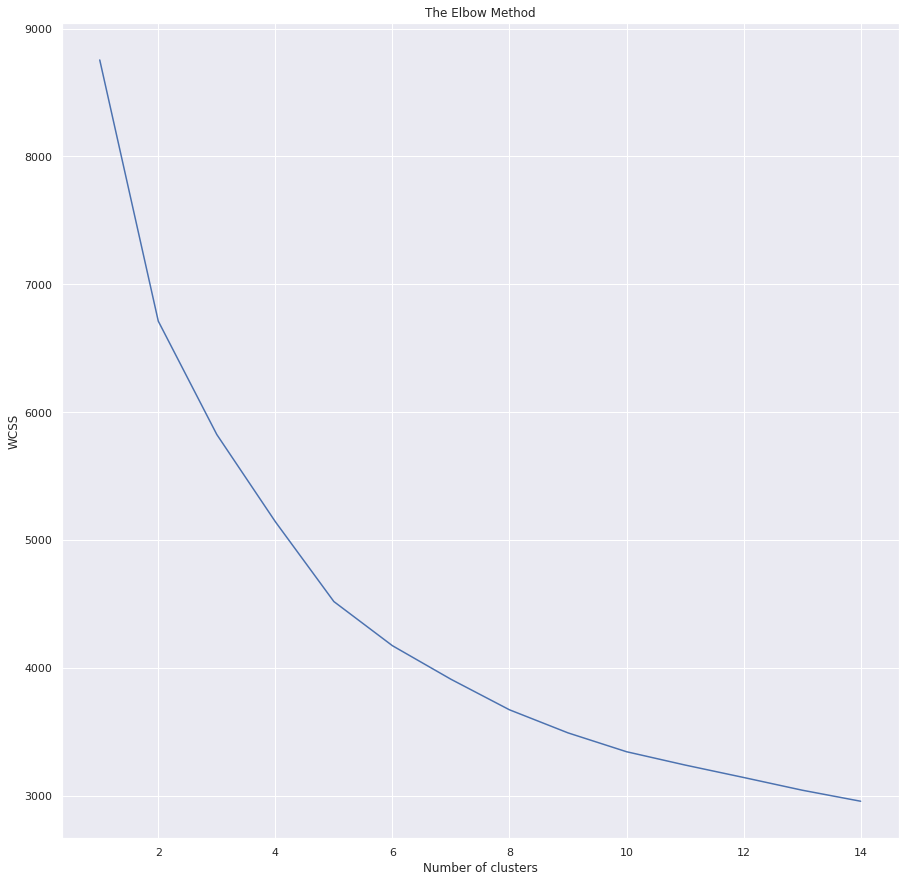

In [ ]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init="k-means++",random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [ ]:
kmeans=KMeans(n_clusters=6)
kmeans.fit(df)

KMeans(n_clusters=6)

In [ ]:
y_kmeans = kmeans.predict(df)

In [ ]:
df[y_kmeans==0].head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2   0.126690           0.146792  -0.030506          0.030852   
6  -0.061082           0.070280   0.386533          0.474863   
18  0.072489           0.184100  -0.082970         -0.091297   
21  0.336802           0.075585   0.365788          0.467408   
33 -0.207588           0.155581  -0.051502          0.008025   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                -0.128798     -0.132258             0.359794   
6                 0.041600     -0.063321             0.172259   
18               -0.028575     -0.165871             0.156108   
21                0.006267     -0.052167             0.185261   
33               -0.136510     -0.140176             0.318983   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                     0.757488                         -0.259819   
6                     0.362664                          0.216937   
18                   -0.141897                          0.195720   
21                    0.349284                          0.233312   
33                    0.718953                         -0.275374   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                -0.191351         -0.134888      -0.030889      0.234065   
6                -0.091614         -0.064581       0.269003      0.335764   
18               -0.239984         -0.169171      -0.081628      0.830710   
21                0.144492          0.058816       0.453652      0.270888   
33               -0.202808         -0.142964      -0.044820     -0.271895   

    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
2  -0.108746         -0.026433         -0.148908  0.102194  
6   0.216546         -0.037616          0.392508  0.048928  
18 -0.001511         -0.015278         -0.186754  0.128167  
21  0.017377          0.050965         -0.076674  0.052621  
33 -0.135860         -0.083500          0.150196  0.108312

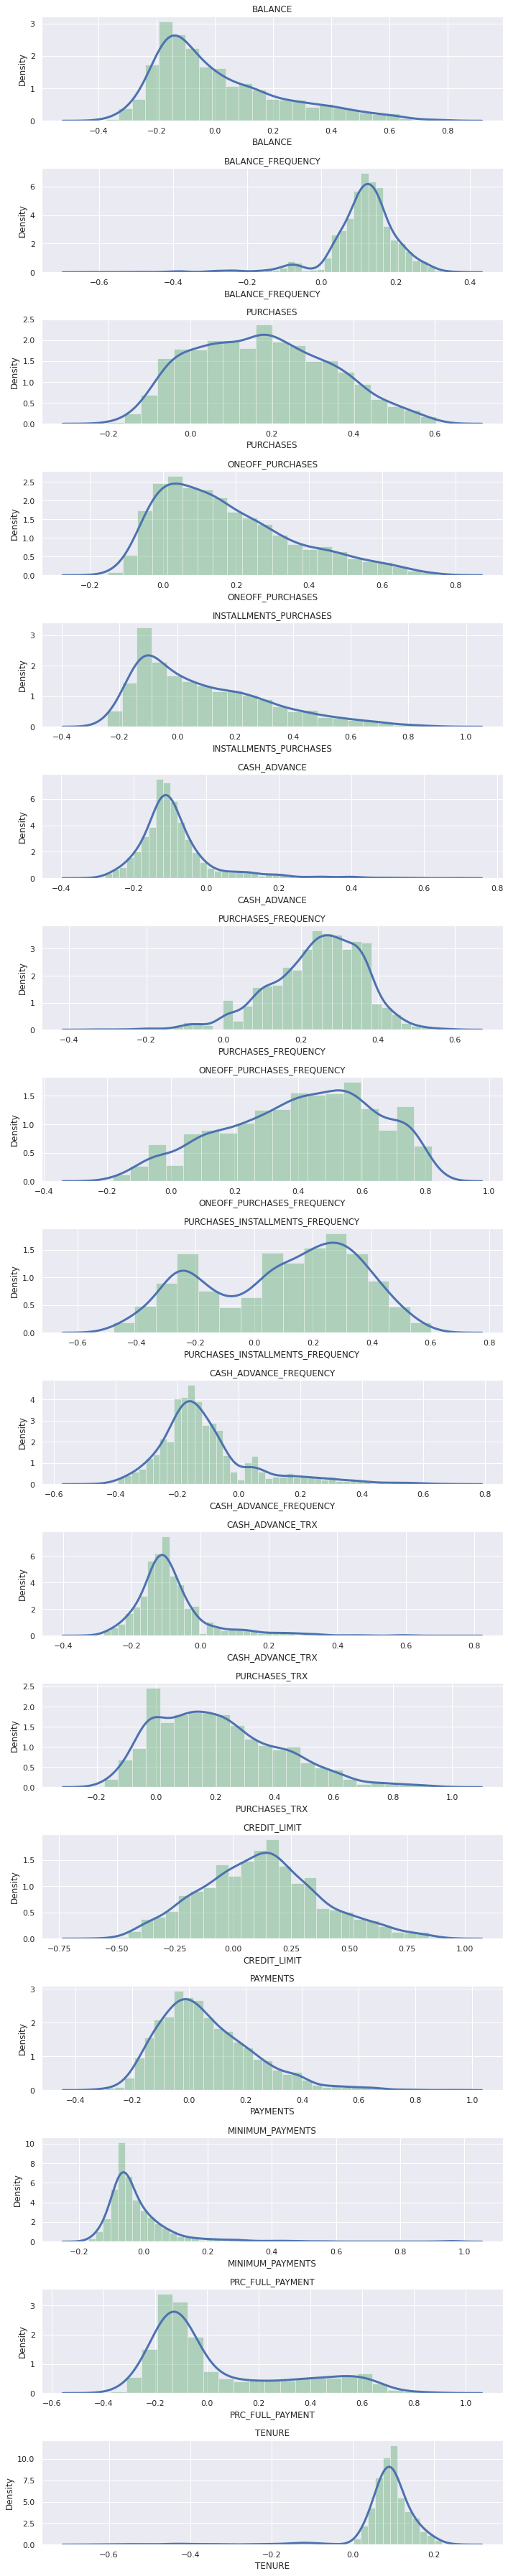

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,50))
for i in range(len(df[y_kmeans==0].columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(df[y_kmeans==0][df[y_kmeans==0].columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
  plt.title(df[y_kmeans==0].columns[i])
plt.tight_layout()

In [ ]:
df[y_kmeans==1].head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  -0.312090          -0.106349  -0.181160         -0.152182   
4  -0.151657           0.218998  -0.195318         -0.146804   
8  -0.154764           0.303684  -0.038880          0.024386   
11 -0.220087          -0.122381   0.112289          0.265962   
14  0.253304           0.226062  -0.204885         -0.155745   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                -0.148833     -0.199018            -0.343854   
4                -0.192153     -0.197314            -0.428679   
8                -0.136816     -0.273615            -0.229323   
11               -0.223030     -0.229020            -0.293819   
14               -0.198351     -0.131515            -0.533104   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    -0.289353                         -0.301569   
4                    -0.168795                         -0.387621   
8                    -0.234068                         -0.168785   
11                    0.078191                         -0.449907   
14                   -0.296128                         -0.400123   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                -0.287941         -0.202977      -0.218012     -0.409466   
4                -0.285475         -0.201239      -0.233151     -0.382724   
8                -0.395868         -0.279057      -0.228980      0.403681   
11               -0.331348         -0.233575      -0.171921     -0.336346   
14               -0.112975         -0.143789      -0.258225     -0.179202   

    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0  -0.225535         -0.128931         -0.224073  0.153779  
4  -0.154021         -0.108749         -0.222155  0.152462  
8  -0.211567         -0.133922         -0.308061  0.211419  
11 -0.174146         -0.144994         -0.257852  0.176961  
14 -0.139799          0.027134         -0.229320  0.157380

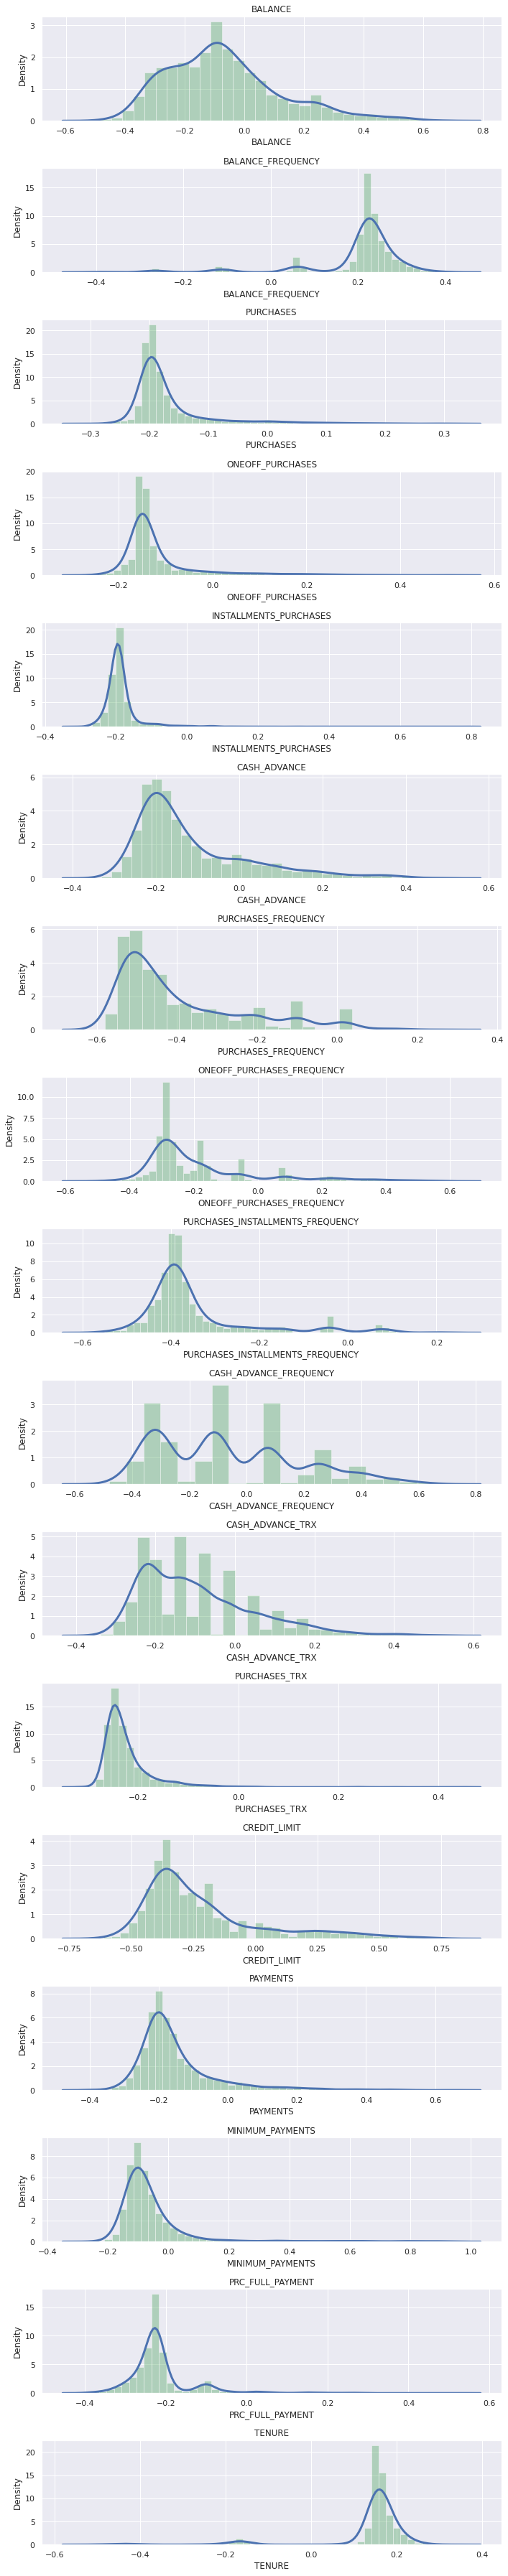

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,50))
for i in range(len(df[y_kmeans==1].columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(df[y_kmeans==1][df[y_kmeans==1].columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
  plt.title(df[y_kmeans==1].columns[i])
plt.tight_layout()

In [ ]:
df[y_kmeans==2].head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5   0.053689           0.235968   0.070366         -0.162570   
7   0.047246           0.196575  -0.100695         -0.135431   
10 -0.046457           0.184622  -0.013858         -0.127195   
12 -0.008058           0.182753   0.365671          0.405454   
13 -0.124403           0.208702   0.213950         -0.041861   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5                 0.464491     -0.212604             0.200090   
7                 0.010545     -0.177111             0.481813   
10                0.200604     -0.166341             0.452515   
12                0.119636     -0.164658             0.447935   
13                0.582188     -0.188037             0.260611   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5                    -0.309105                          0.250862   
7                    -0.257502                          0.606780   
10                   -0.241844                          0.569883   
12                    0.056216                          0.490150   
13                   -0.048330                          0.390810   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5                -0.307597         -0.216832      -0.122950     -0.337272   
7                -0.256246         -0.180634      -0.041365     -0.228826   
10               -0.240664         -0.169650      -0.038850     -0.322647   
12               -0.238228         -0.167933       0.160225     -0.144871   
13               -0.272054         -0.191777       0.182975      0.332782   

    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
5  -0.052405          0.305054         -0.239369  0.164276  
7  -0.138155         -0.050891         -0.199408  0.136852  
10 -0.079994          0.202843         -0.187283  0.128530  
12 -0.137068         -0.053638          0.116125  0.127229  
13 -0.010750         -0.102540         -0.096936  0.145294

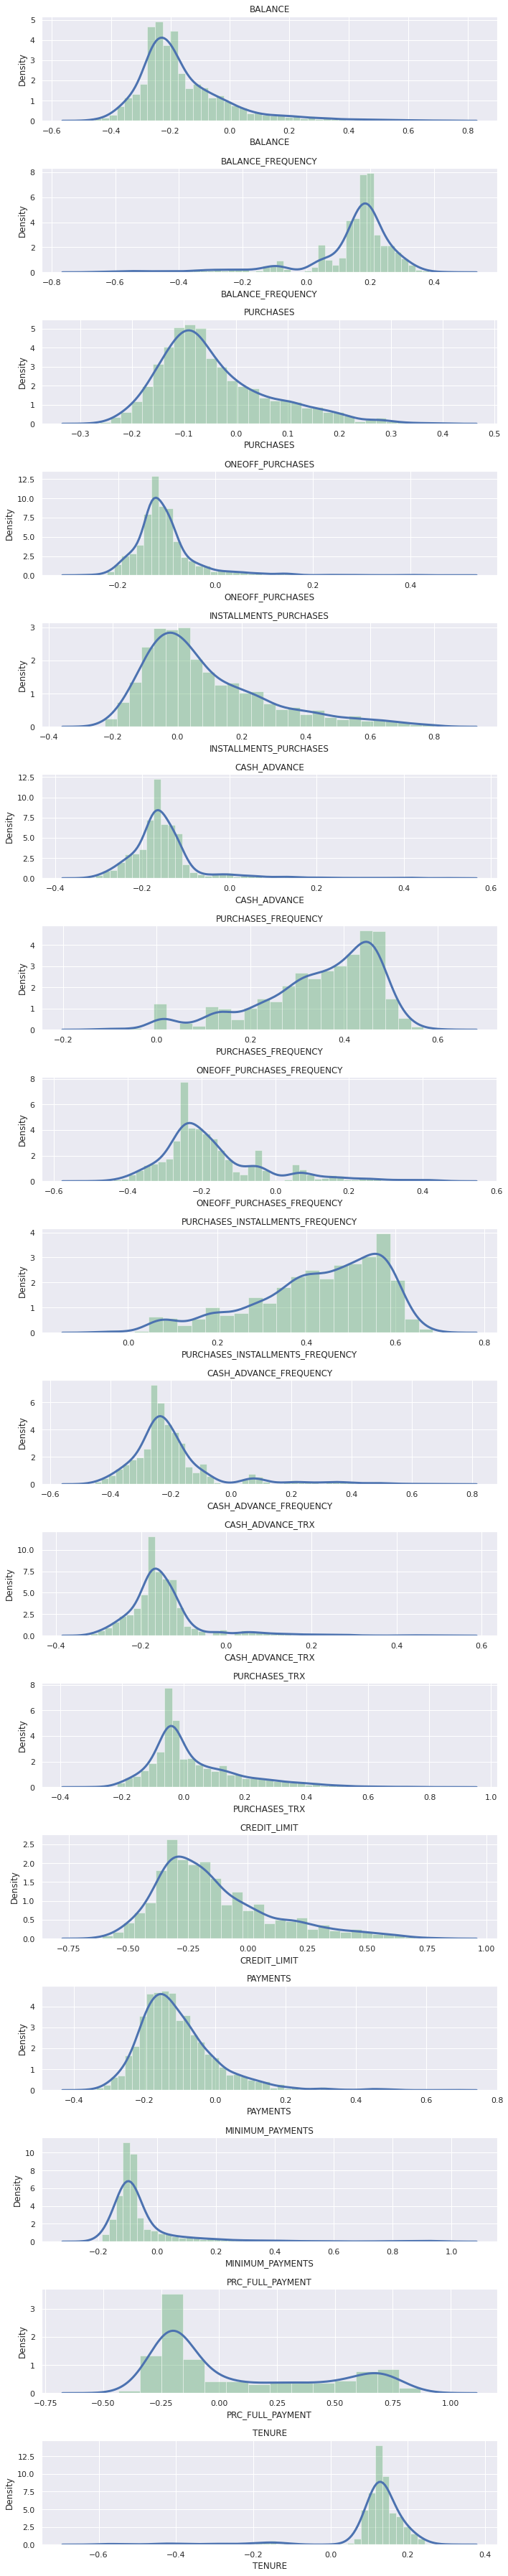

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,50))
for i in range(len(df[y_kmeans==2].columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(df[y_kmeans==2][df[y_kmeans==2].columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
  plt.title(df[y_kmeans==2].columns[i])
plt.tight_layout()

In [ ]:
df[y_kmeans==3].head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3   0.020495          -0.424496   0.096865          0.227990   
9  -0.223812          -0.462040   0.042982          0.136961   
17 -0.291685          -0.711170  -0.090320         -0.142249   
60  0.070040          -0.293377  -0.193052         -0.133834   
63 -0.184212          -0.817283  -0.018807          0.036722   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                -0.189749     -0.153883            -0.423316   
9                -0.149947     -0.153974            -0.266029   
17                0.047567     -0.186029            -0.073166   
60               -0.210618     -0.216275            -0.373670   
63               -0.111919     -0.114925            -0.249684   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                    -0.166684                         -0.382772   
9                    -0.039575                         -0.302481   
17                   -0.270468                         -0.031191   
60                   -0.055588                         -0.424871   
63                   -0.098315                         -0.225769   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                -0.108075         -0.137554      -0.230234      0.344830   
9                -0.222771         -0.157037      -0.155398      0.589807   
17               -0.269148         -0.189729      -0.107582     -0.218441   
60               -0.312909         -0.220577      -0.236916      0.255413   
63               -0.166275         -0.117211      -0.135798     -0.195850   

    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
3  -0.249904         -0.095300         -0.219375  0.150555  
9  -0.064763         -0.105294         -0.173359  0.118974  
17 -0.203548         -0.131844          0.131197  0.143742  
60  0.284336         -0.058953         -0.243503  0.167113  
63 -0.147400         -0.056210         -0.129394  0.088801

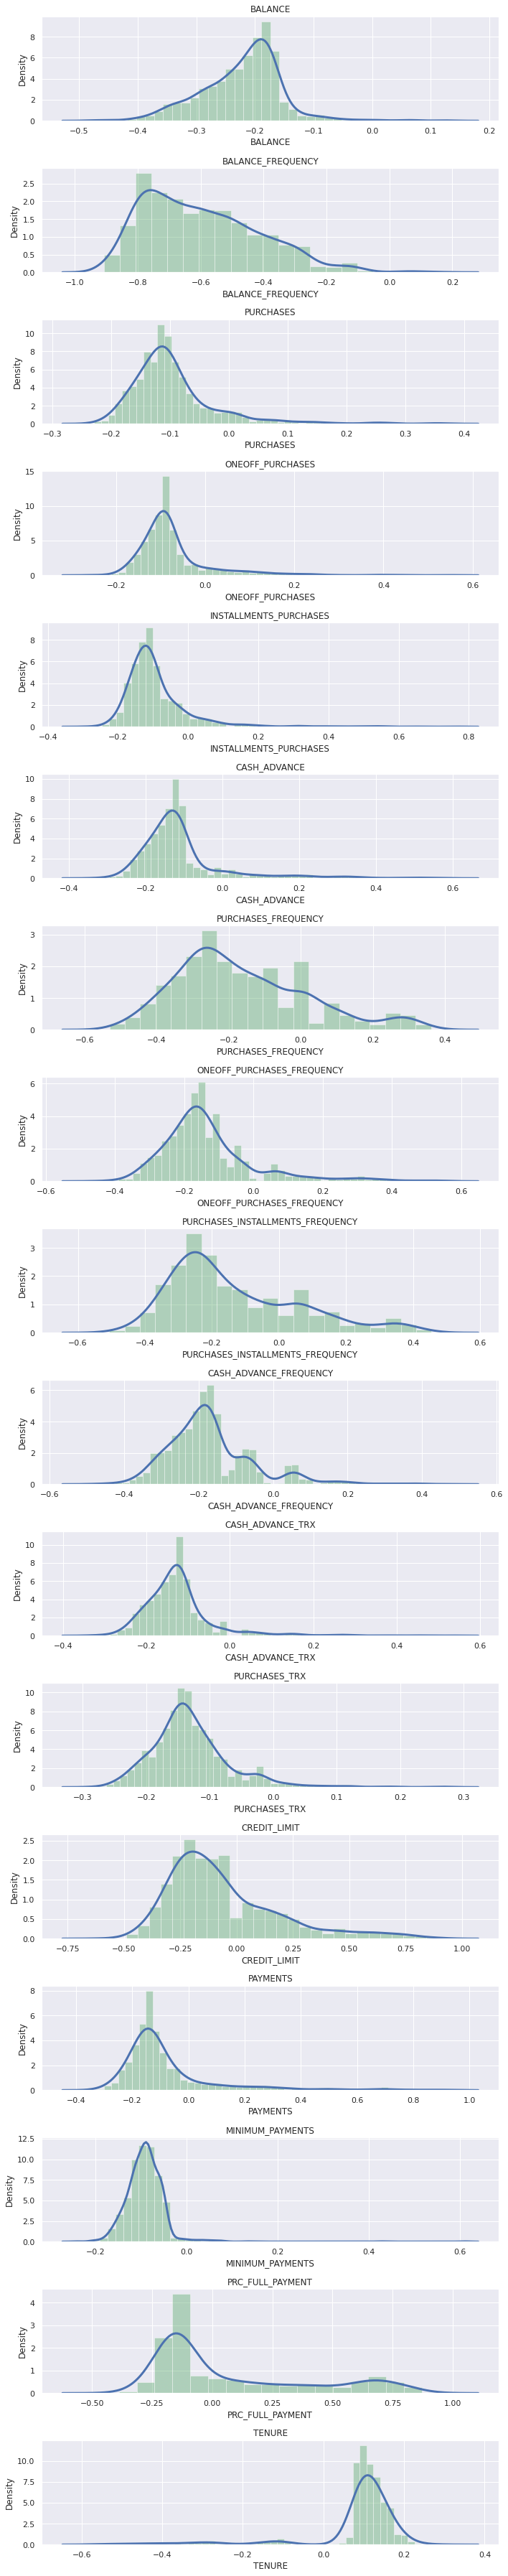

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,50))
for i in range(len(df[y_kmeans==3].columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(df[y_kmeans==3][df[y_kmeans==3].columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
  plt.title(df[y_kmeans==3].columns[i])
plt.tight_layout()

In [ ]:
df[y_kmeans==4].head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
16  0.069149          -0.002718  -0.133139         -0.101207   
46 -0.149104          -0.453436  -0.119065         -0.101625   
53 -0.173494           0.016104   0.149996          0.274336   
66 -0.103859          -0.002746  -0.134509         -0.102249   
72 -0.126631           0.150312  -0.136231         -0.103558   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
16               -0.128893      0.244112            -0.346424   
46               -0.094873      0.004723            -0.081829   
53               -0.149257      0.156949             0.144245   
66               -0.130219     -0.009623            -0.349989   
72               -0.131887      0.068551            -0.354470   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
16                   -0.192431                         -0.260010   
46                   -0.193225                         -0.081983   
53                    0.510930                         -0.301090   
66                   -0.194411                         -0.262686   
72                   -0.196900                         -0.266049   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
16                0.162745         -0.010339      -0.167801     -0.116450   
46               -0.014433         -0.093823      -0.134130     -0.218658   
53               -0.039434         -0.108200      -0.049006     -0.134848   
66               -0.014522         -0.094399      -0.169528     -0.235747   
72               -0.014708         -0.010579      -0.171698      0.199807   

    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
16 -0.131363         -0.056927         -0.149018 -0.745238  
46 -0.153145         -0.085159         -0.149633 -0.748314  
53  0.156171         -0.100285          0.051960 -0.617629  
66 -0.157048         -0.081726         -0.150551 -0.752907  
72 -0.082451         -0.087552          0.095511 -0.762546

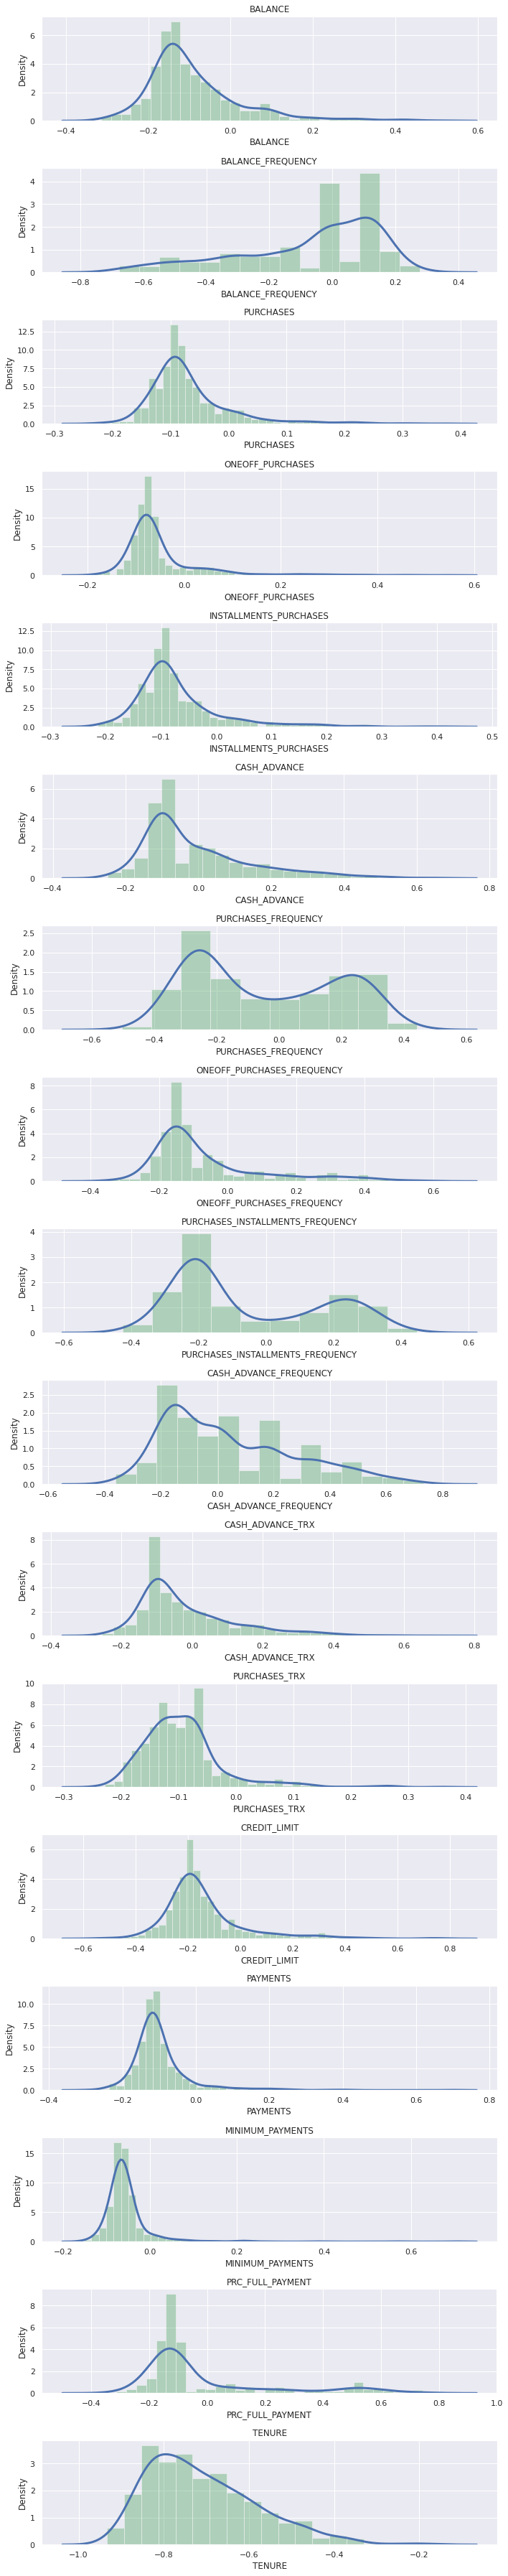

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,50))
for i in range(len(df[y_kmeans==4].columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(df[y_kmeans==4][df[y_kmeans==4].columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
  plt.title(df[y_kmeans==4].columns[i])
plt.tight_layout()

In [ ]:
df[y_kmeans==5].head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1   0.219912           0.037536  -0.131214         -0.099743   
15  0.755658           0.153119   0.084175         -0.105492   
23  0.185041          -0.042971   0.261664          0.297064   
24  0.597371           0.169337  -0.153474         -0.116665   
28  0.514314           0.099243  -0.055244         -0.044766   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                -0.127029      0.728121            -0.341413   
15                0.392404      0.186405             0.007106   
23                0.072911      0.574685             0.218759   
24               -0.148579     -0.028043            -0.399334   
28               -0.048418      0.114848             0.084153   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                    -0.189648                         -0.256249   
15                   -0.200578                          0.100813   
23                   -0.068792                          0.239376   
24                   -0.221822                         -0.299722   
28                   -0.022982                          0.025175   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                 0.160391          0.030760      -0.165374      0.192447   
15                0.046557          0.032532      -0.044111      0.284768   
23                0.170619          0.246160      -0.011850      0.213336   
24                0.373210          0.035978      -0.193430      0.135263   
28                0.668350          0.357927      -0.051710      0.316191   

    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
1   0.228765          0.027246          0.065453  0.100790  
15  0.026574          0.160276         -0.155326  0.106599  
23  0.460951          0.042873         -0.090538  0.062135  
24 -0.035048          0.113791         -0.171778 -0.126349  
28 -0.008714          0.066020         -0.100674  0.069091

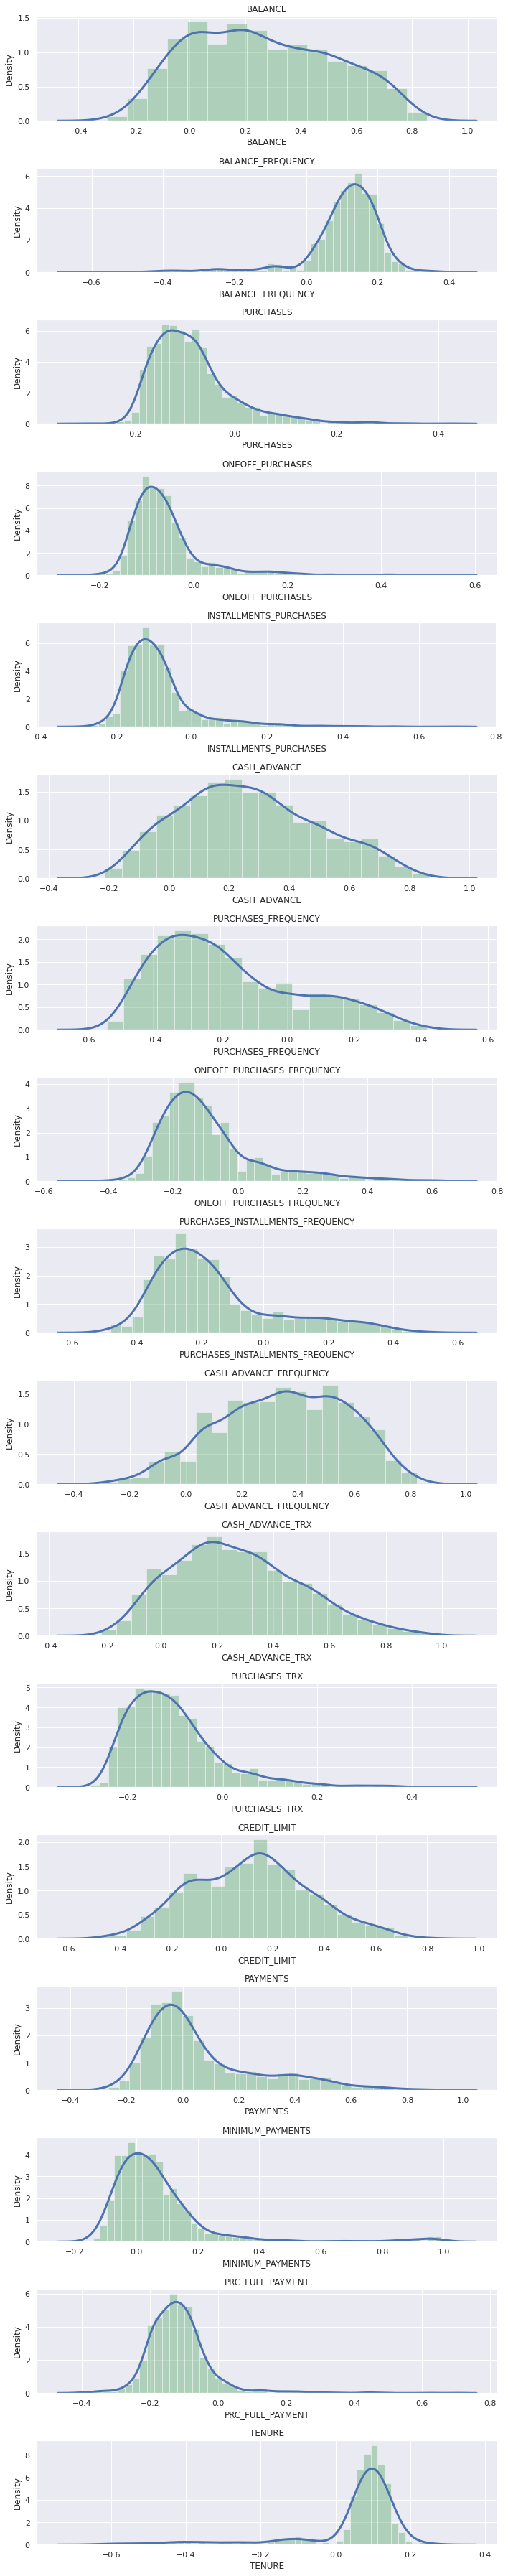

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,50))
for i in range(len(df[y_kmeans==5].columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(df[y_kmeans==5][df[y_kmeans==5].columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
  plt.title(df[y_kmeans==5].columns[i])
plt.tight_layout()

In [ ]:
df['cluster_id'] = kmeans.labels_

In [ ]:
cluster = df.copy(deep=True).filter(['cluster_id'])
pca = pd.merge(pca, cluster, left_index=True, right_index=True)
print(pca)

             a         b  cluster_id
0    -0.490443 -0.679237           1
1    -0.518541  0.545285           5
2     0.330939  0.269024           0
3    -0.479447 -0.105320           3
4    -0.563829 -0.480941           1
...        ...       ...         ...
8945  0.328634 -0.198555           4
8946  0.259831 -0.174047           4
8947  0.188685 -0.248606           4
8948 -0.313195 -0.171346           4
8949  0.012860  0.097443           4

[8950 rows x 3 columns]


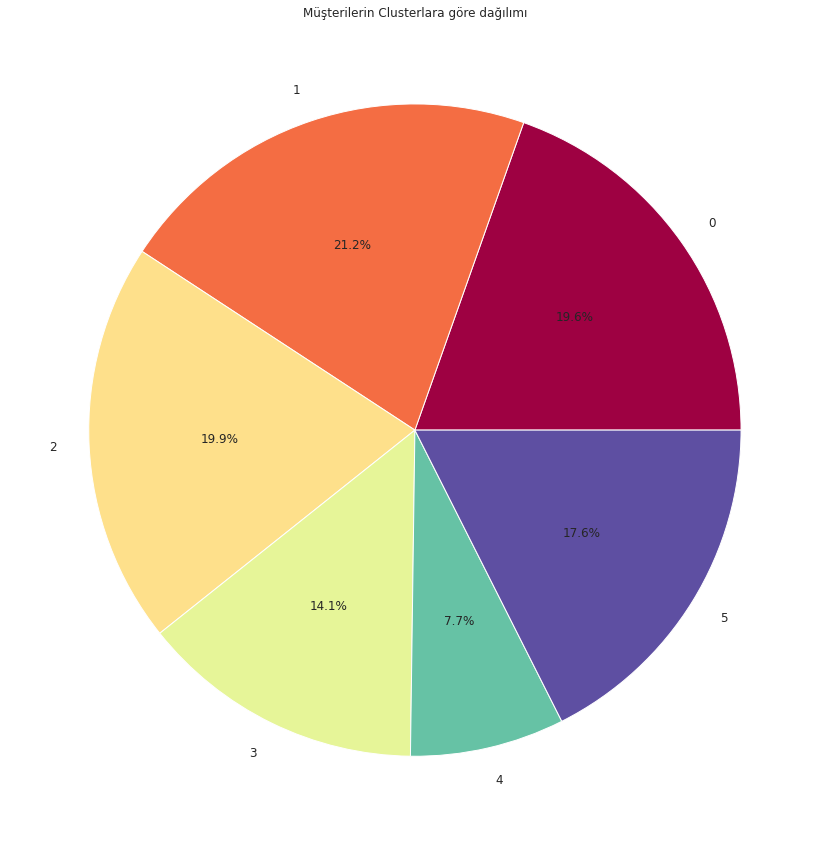

In [ ]:
pie_cluster = pca.groupby([
                df['cluster_id']]).size()
plot = pie_cluster.plot.pie(y='cluster_id', figsize=(15, 15), 
                      title="Müşterilerin Clusterlara göre dağılımı",
                      autopct='%1.1f%%', ylabel="", colormap="Spectral", fontsize=12)

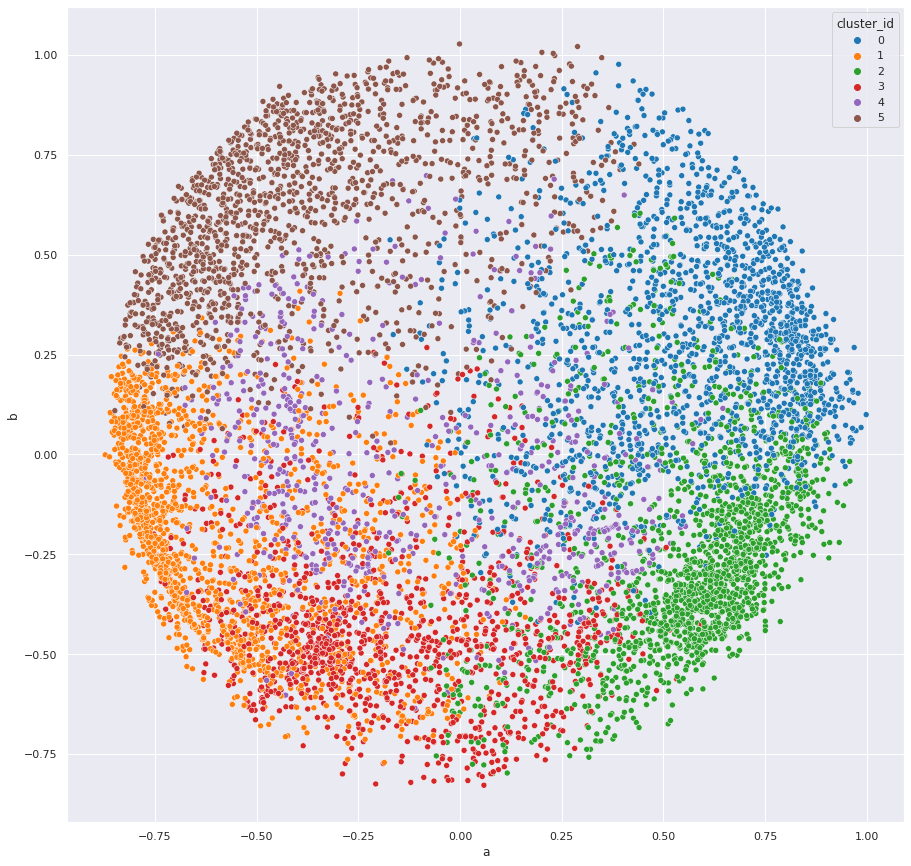

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(data=pca, x='a', y='b', hue='cluster_id', palette="tab10")


In [ ]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'cluster_id'],
      dtype='object')

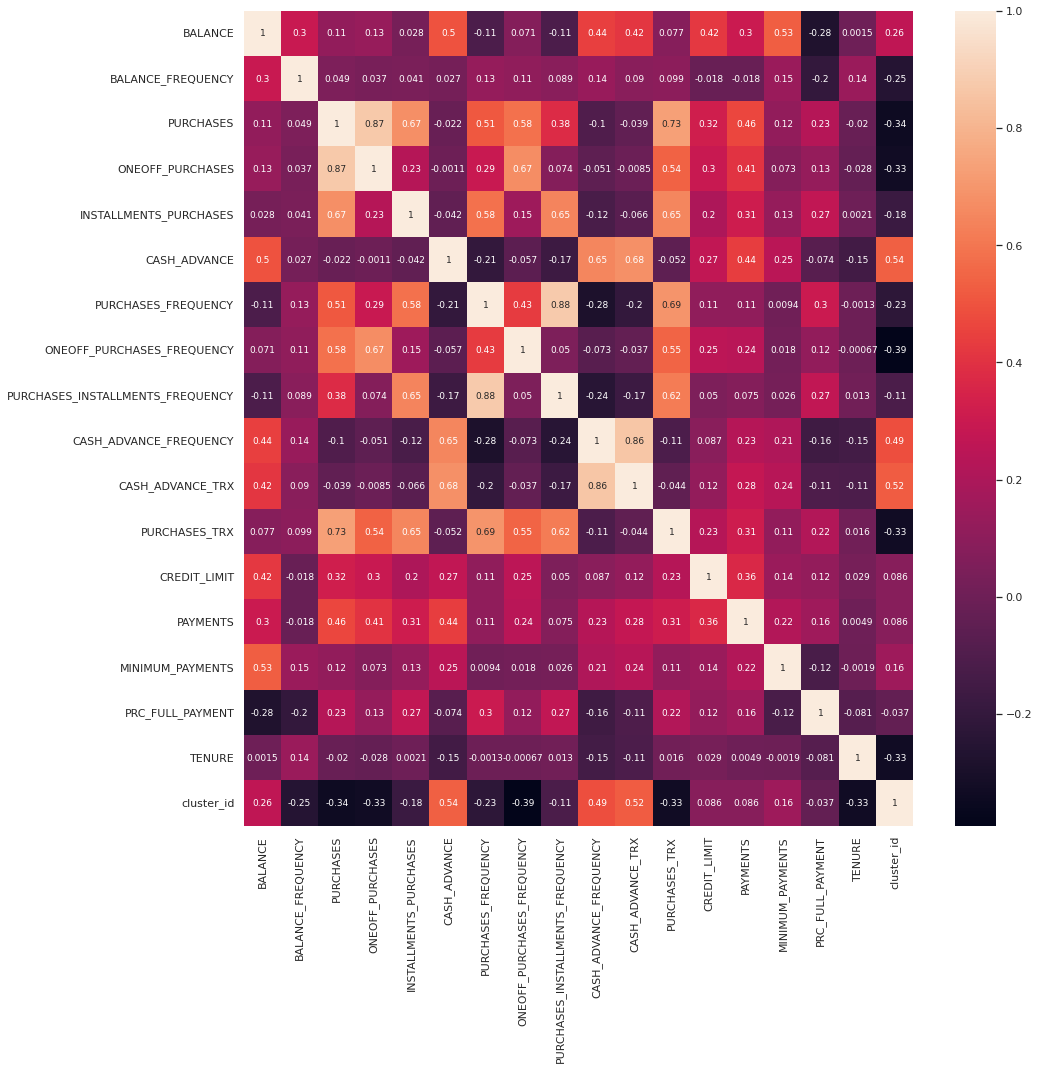

In [ ]:
df.columns =['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE','cluster_id']
corr = df.corr(method='pearson')

corr.columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE','cluster_id']
sns.heatmap(corr,annot=True, annot_kws={'size':9})


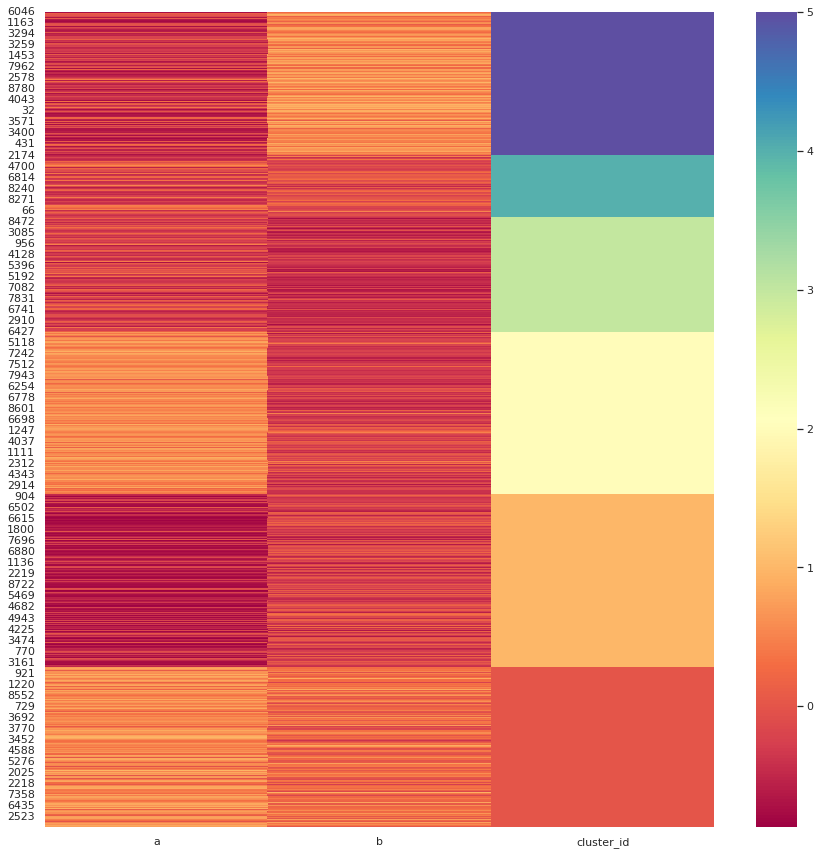

In [ ]:
sns.heatmap(pca.sort_values('cluster_id', ascending=False), cmap="Spectral")